In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**importing data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/insurance/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**observation** Rows = 1338 and columns = 7

**Handling null values**

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**observation** There are no null values

**Handling duplicate values**

In [9]:
df.duplicated().sum()

1

**observation** There is one duplicate value

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
df.drop_duplicates(inplace = True)

In [12]:
def num_coulmn_visualisation(df, column):
  plt.figure(figsize = (10, 4))

  plt.subplot(1,2,1)
  sns.histplot(data = df, x = column)

  plt.subplot(1,2,2)
  sns.boxplot(data = df,  y = column)

  plt.show()

In [13]:
def cat_column_visualisation(df, column):
  plt.figure(figsize = (10, 4))
  plt.subplot(1,2,1)
  sns.countplot(data = df, y = column)

  plt.subplot(1,2,2)
  plt.pie(df[column].value_counts().values, labels = df[column].value_counts().index, autopct = '%0.2f%%')
  plt.show()

**age**

Checking distribution of age data

In [14]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

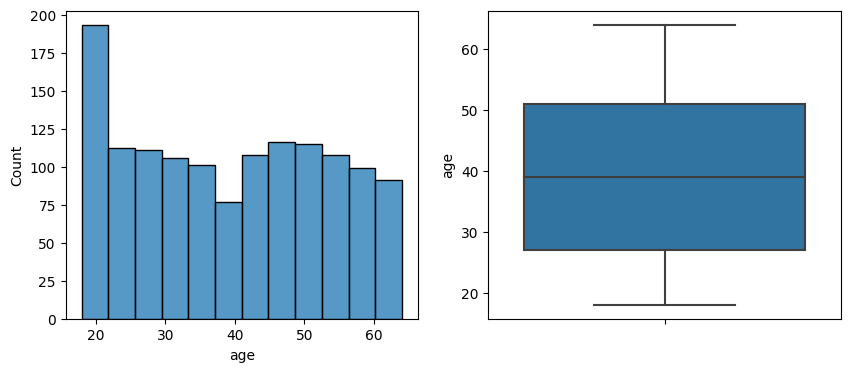

In [15]:
num_coulmn_visualisation(df, 'age')

**observation**
1. Age is distributed almost eqaully across all the age groups
2. And there are no outliers in age

**question??** Is there any relation between age and charges

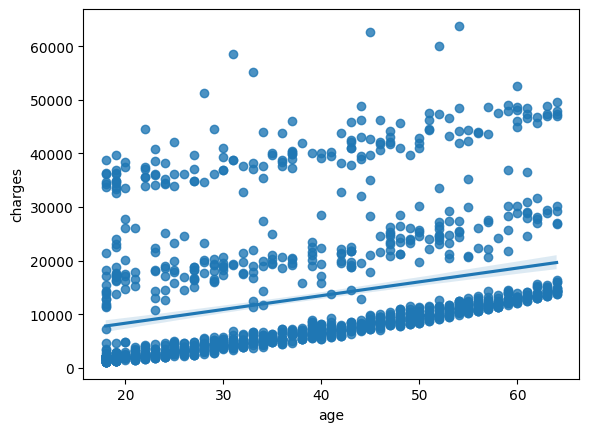

In [16]:
sns.regplot(data = df, x = 'age', y = 'charges')
plt.show()

In [17]:
df['age'].corr(df['charges'])

0.2983082125097864

**observation** There is very slight positive correlation between age and charges

**sex**

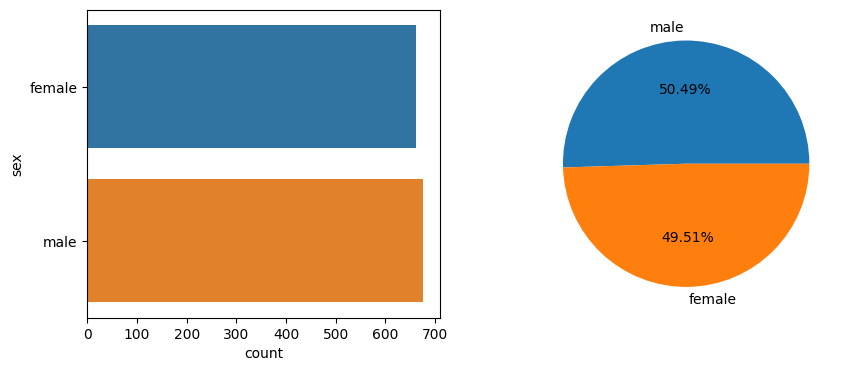

In [18]:
cat_column_visualisation(df, 'sex')

**observation** Male and Female are distributed 50-50

In [19]:
gender_avg_charges = df.groupby('sex')['charges'].mean().reset_index()
gender_avg_charges

,sex,charges
0,female,12569.578844
1,male,13974.998864


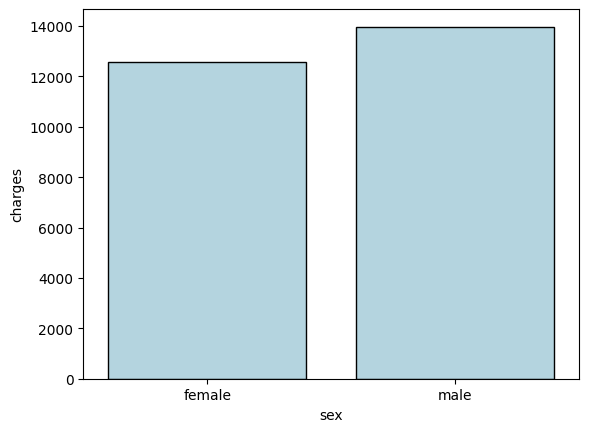

In [20]:
sns.barplot(data = gender_avg_charges, x = 'sex', y = 'charges', color = 'lightblue', edgecolor = 'black')
plt.show()

**observation** males are having slightly higher charges than females

**bmi**

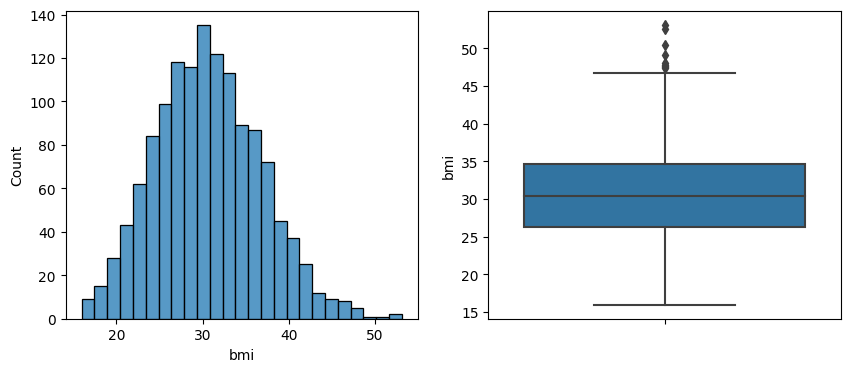

In [21]:
num_coulmn_visualisation(df, 'bmi')

In [22]:
print(f'Mean of bmi : {round(df["bmi"].mean(), 2)}')
print(f'Median of bmi : {round(df["bmi"].median(), 2)}')

Mean of bmi : 30.66
Median of bmi : 30.4


**observation** <br>
1. mean and median coincide
2. bmi follows almost normal distribution

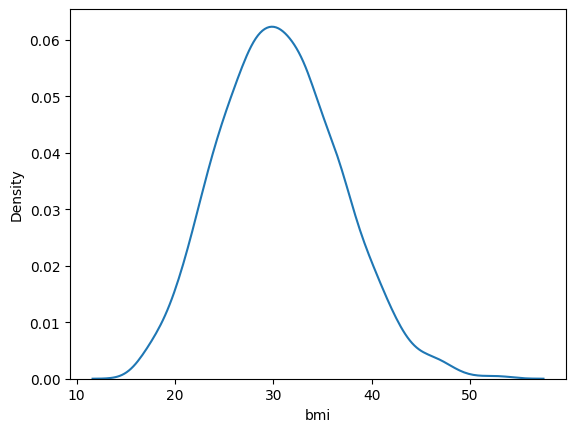

In [23]:
sns.kdeplot(data = df, x = 'bmi')
plt.show()

**question??** is there any relation between price and bmi

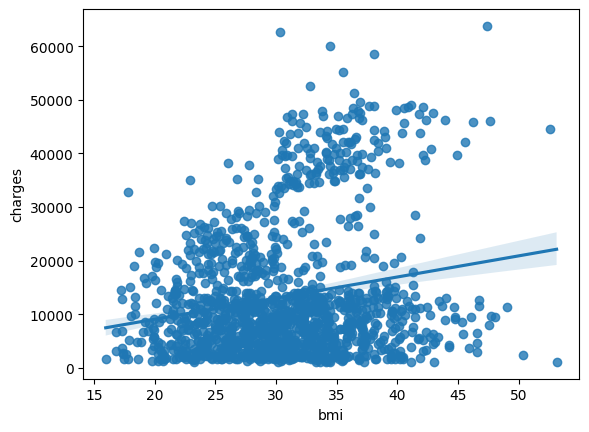

In [24]:
sns.regplot(data = df, x = 'bmi', y = 'charges')
plt.show()

In [25]:
df['bmi'].corr(df['charges'])

0.19840083122624938

**observation** There is very slight positive correlation between bmi and charges

**children**

In [26]:
children_mean_charges = df.groupby('children')['charges'].mean().reset_index()
children_mean_charges

,children,charges
0,0,12384.695344
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


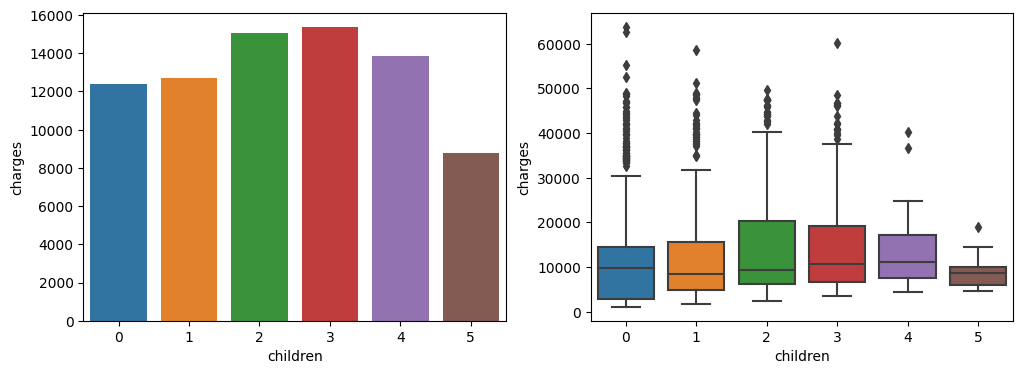

In [27]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
sns.barplot(data = children_mean_charges, x = 'children', y = 'charges')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'children', y = 'charges')
plt.show()

**smoker**

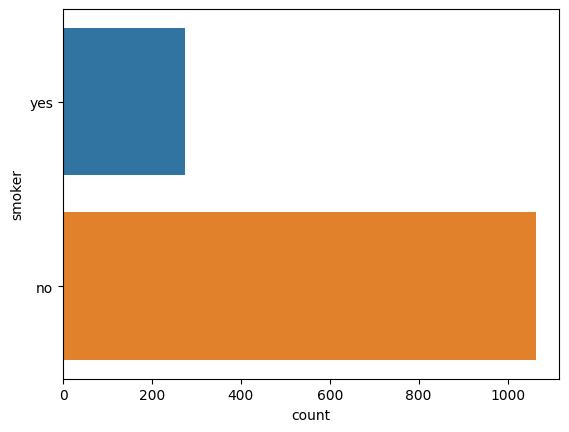

In [28]:
sns.countplot(data = df, y = 'smoker')
plt.show()

**observation** Majority of people are non-smoker

**region**

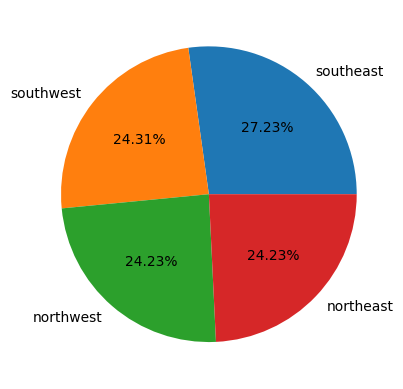

In [29]:
plt.pie(df['region'].value_counts().values, labels = df['region'].value_counts().index, autopct = '%.2f%%')
plt.show()

region and charges

In [30]:
region_charges = df.groupby('region')['charges'].mean().reset_index()
region_charges

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


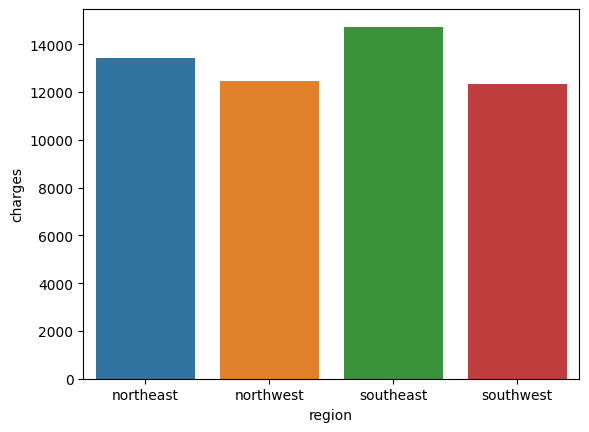

In [31]:
sns.barplot(data = region_charges, x = 'region', y = 'charges')
plt.show()

**charges**<br>
Lets see distribution of charges

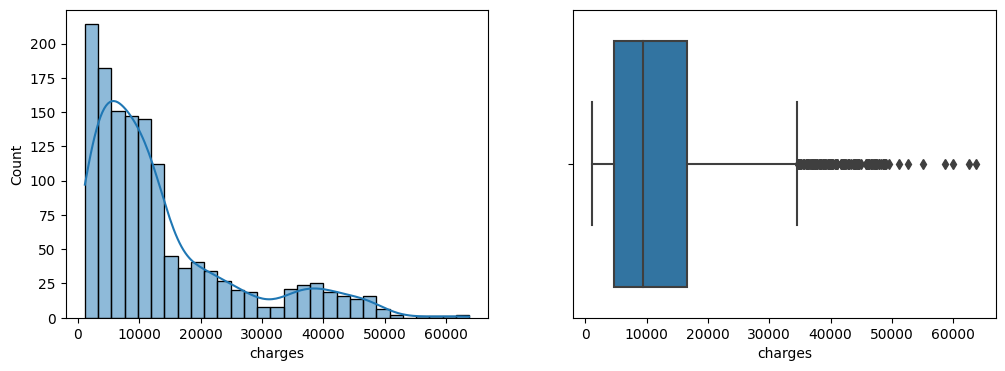

In [32]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'charges', kde = True)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'charges')

plt.show()

**observation**<br>
1. charges is very left biased
2. and there are many outliers

**changing categorical column to numeric column**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**correlation**

In [37]:
corr = df.corr()

In [38]:
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


**correlation heatmap**

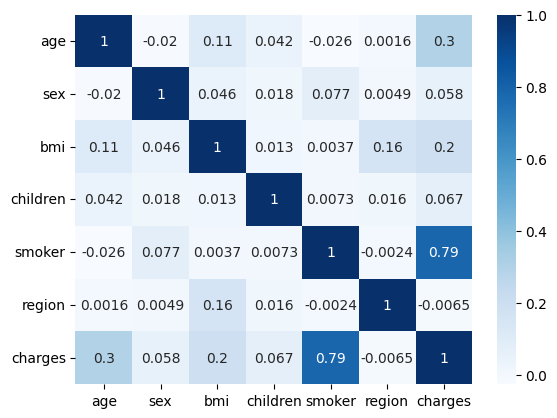

In [39]:
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.show()

**LinearRegression Model**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('charges', axis = 1)
y = df.loc[:, 'charges']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 6)
(335, 6)
(1002,)
(335,)


**Creating Model**

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg = LinearRegression()

In [46]:
m = lin_reg.fit(X_train, y_train)

**model evaluation**

In [49]:
from sklearn import metrics

In [59]:
def Evaluation(X_test, y_test, model) :
  y_pred = model.predict(X_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  print("mean_absolute_error        : ", round(mse, 2))
  print("mean_squared_error         : ", round(msqe, 2))
  print("root_mean_absolute_error   : ", round(rmse, 2))
  print("R2_score                   : ", round(r2_score, 2))

In [60]:
Evaluation(X_test, y_test, m)

mean_absolute_error        :  4149.3
mean_squared_error         :  35847457.27
root_mean_absolute_error   :  5987.27
R2_score                   :  0.72


In [61]:
Evaluation(X_train, y_train, m)

mean_absolute_error        :  4340.31
mean_squared_error         :  37049294.36
root_mean_absolute_error   :  6086.81
R2_score                   :  0.76
